# Credit Ratings EDA

Original data source: https://www.kaggle.com/datasets/agewerc/corporate-credit-rating

In [44]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Load into pandas
# ~\..\Box\STAT 222 Capstone\Raw Data\Credit Rating Data From Kaggle\corporate_rating.csv
corporate_rating = pd.read_csv('~\Box\STAT 222 Capstone\Raw Data\Credit Rating Data From Kaggle\corporate_rating.csv')
corporate_rating

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ijyli\AppData\Local\Temp\ipykernel_12300\4272307766.py:3: SyntaxWarning: invalid escape sequence '\B'
  corporate_rating = pd.read_csv('~\Box\STAT 222 Capstone\Raw Data\Credit Rating Data From Kaggle\corporate_rating.csv')


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,1.079762,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,30.602414,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,147.599371,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,131.644566,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [46]:
# All columns
print(corporate_rating.columns)

Index(['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector',
       'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
       'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
       'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed',
       'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover',
       'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
       'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare',
       'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
       'enterpriseValueMultiple', 'operatingCashFlowPerShare',
       'operatingCashFlowSalesRatio', 'payablesTurnover'],
      dtype='object')


In [47]:
# Summarize variables
corporate_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


In [48]:
# Convert Date to date format. It's 'M/D/YYYY'
# Represents the date of issue of a credit rating
corporate_rating['Date'] = pd.to_datetime(corporate_rating['Date'], format='%m/%d/%Y')

Axes(0.125,0.11;0.775x0.77)
Year
2005      1
2009      1
2010      9
2011     58
2012    357
2013    312
2014    383
2015    480
2016    428
Name: count, dtype: int64


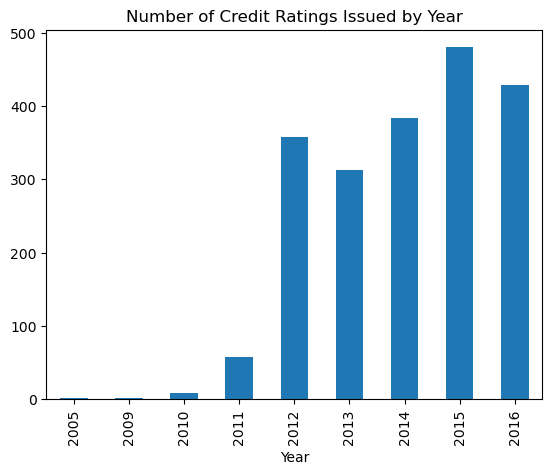

In [49]:
# Create Year variable
corporate_rating['Year'] = corporate_rating['Date'].dt.year

# Bar chart, sorted by Year
print(corporate_rating['Year'].value_counts().sort_index().plot(kind='bar', title='Number of Credit Ratings Issued by Year'))

# Table of values of Year
print(corporate_rating['Year'].value_counts().sort_index())

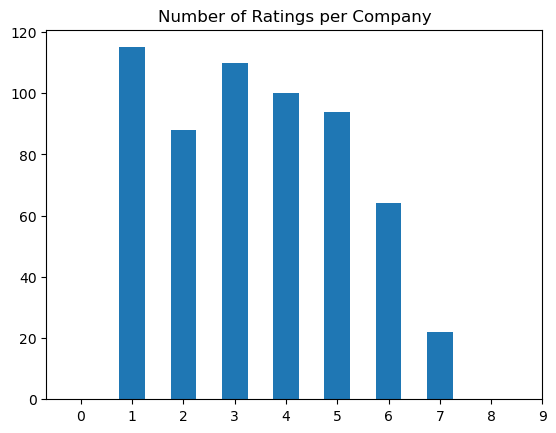

In [50]:
# How many observations/ratings per company? Create histogram with bin width of 1 and axis ticks every 1
# Bars centered over ticks
# Bar width of 0.5
plt.hist(corporate_rating['Name'].value_counts(), bins=range(10), align='left', rwidth=0.5)
plt.xticks(range(10))
plt.title('Number of Ratings per Company')
plt.show()

In [51]:
# Counts of Sector
print(corporate_rating['Sector'].value_counts())

Sector
Energy                   294
Basic Industries         260
Consumer Services        250
Technology               234
Capital Goods            233
Public Utilities         211
Health Care              171
Consumer Non-Durables    132
Consumer Durables         74
Transportation            63
Miscellaneous             57
Finance                   50
Name: count, dtype: int64


<Axes: xlabel='Year'>

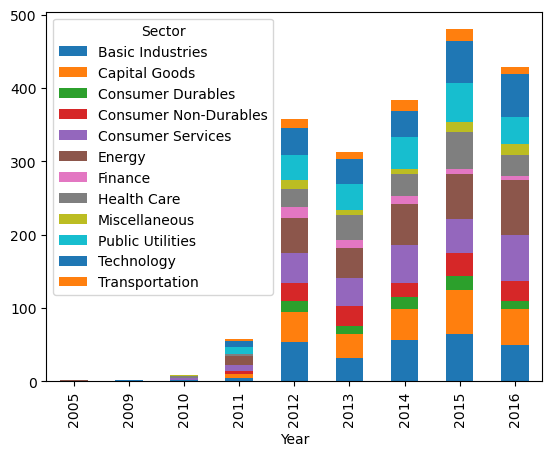

In [52]:
# Bar chart of Sector by Year
corporate_rating.groupby(['Year', 'Sector']).size().unstack().plot(kind='bar', stacked=True)